In [ ]:
# ex04_mlp_활성화함,최적화함수비교_패션데이터_다중분류실습.ipynb
# 런타임 > 런타임유형변경 > GPU 연결
# 드라이브 연동
# 딥러닝 폴더 경로 이동 !

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)

/content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)


### 목표
 - 이미지 형태의 데이터를 이해해보자
 - 활성화 함수, 최적화함수 비교해보자
 - 최적의 모델을 저장, 조기학습중단까지 연결해보자
 - 저장된 모델을 불러와서 사용해보자

In [3]:
# 환경세팅
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#데이터 불러오기 - 패션 아이템 이미지 데이터
from tensorflow.keras.datasets import fashion_mnist

In [4]:
data = fashion_mnist.load_data()
data

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
print(len(data))
print(type(data))
print(len(data[0]), type(data[0]))
print(len(data[1]), type(data[1]))


2
<class 'tuple'>
2 <class 'tuple'>
2 <class 'tuple'>


In [6]:
data[0]
# (X_train, y_train) : (3차원 배열, 1차원 배열)
data[1]
# (X_test, y_test) : : (3차원 배열, 1차원 배열)
# data : ((X_train, y_train), (X_test, y_test))
# 각각 인덱싱하면서 변수에 정리해보기
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]
# 크기확인
print ('훈련셋 : ', X_train.shape, y_train.shape)
print ('테스트셋 : ', X_test.shape, y_test.shape)
# 문제 데이터 : (이미지 개수, 행, 열)

훈련셋 :  (60000, 28, 28) (60000,)
테스트셋 :  (10000, 28, 28) (10000,)


In [7]:
#  변수명 네개를 미리 지정해서 데이터를 담아주는 방법(언패킹 활용)
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
# 크기확인
print('훈련 : ', X_train.shape, y_train.shape)
print('테스트 : ', X_test.shape, y_test.shape)

훈련 :  (60000, 28, 28) (60000,)
테스트 :  (10000, 28, 28) (10000,)


최대: 255
최소: 0


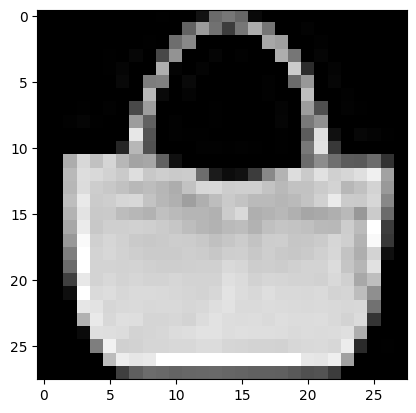

In [8]:
# 이미지 출력해보기
# X_train 100번째 인덱스에 해당하는 이미지 접근하기
img1 = X_train[100]
img1.shape
# max(), min()
print('최대:', img1.max())
print('최소:', img1.min())
# 0~ 255 표현된 이미지
# 0 검은색, 255: 흰색
# 이미지 1장이 2차원으로 표현됨 -> 흑백계열의 이미지
plt.imshow(img1, cmap ='gray')
plt.show() # 가방 이미지 데이터


In [9]:
# y_train 답데이터 100번째 확인해보기
y_train[100]

8

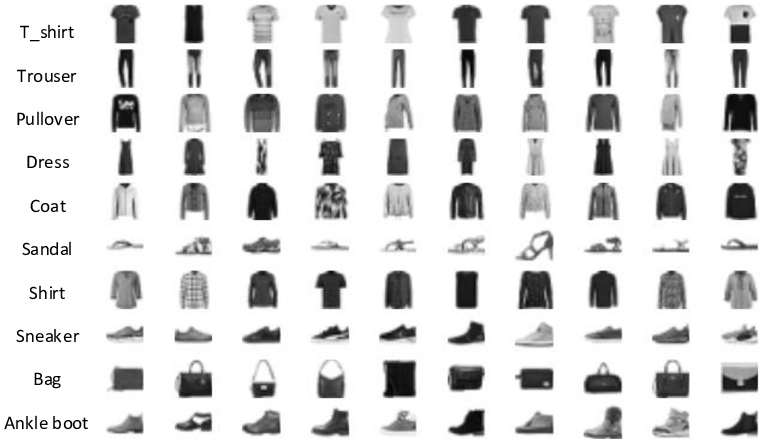

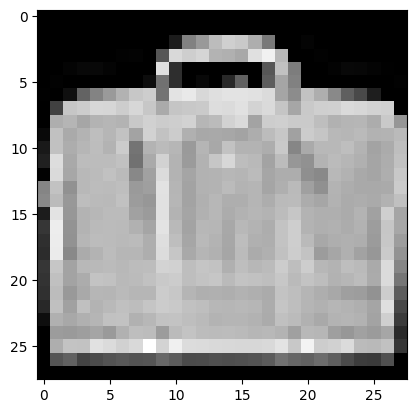

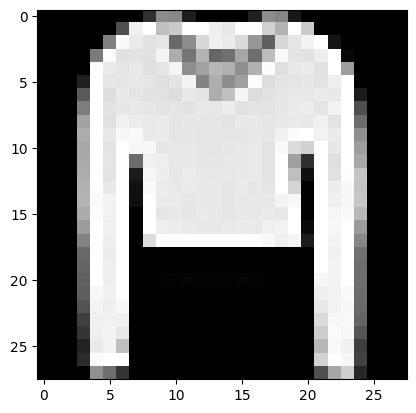

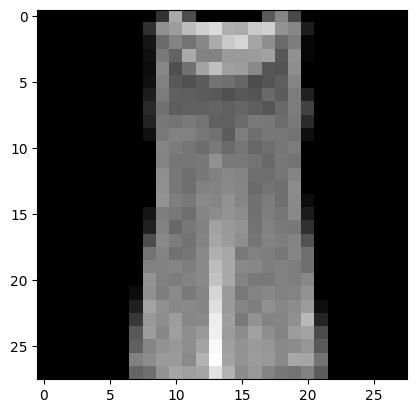

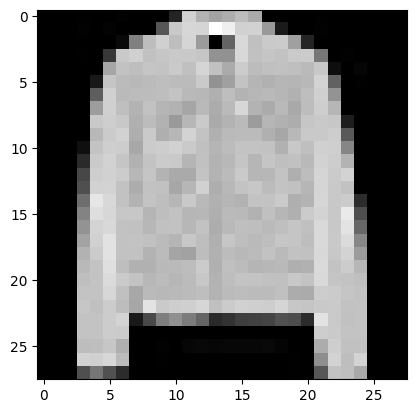

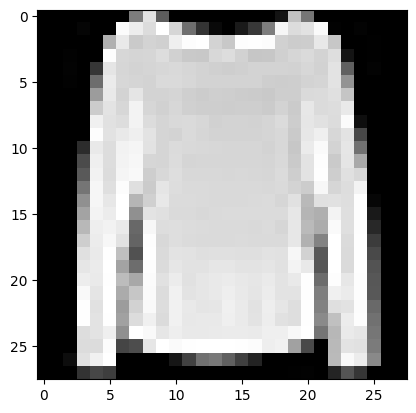

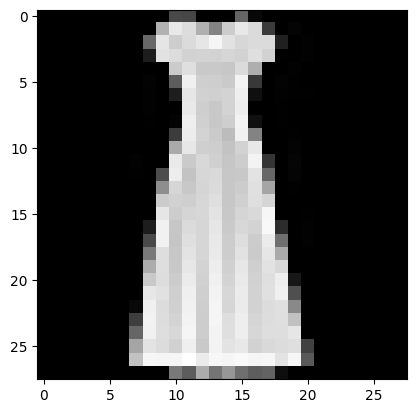

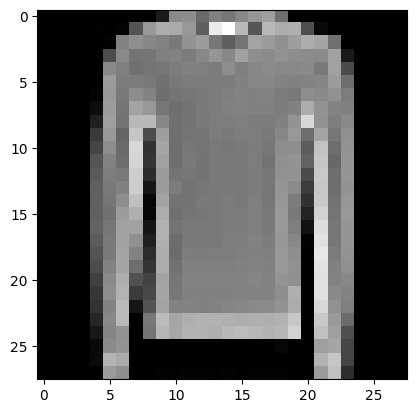

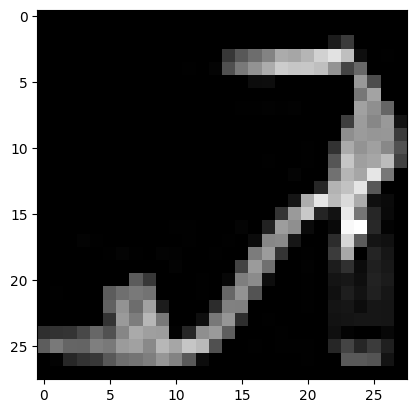

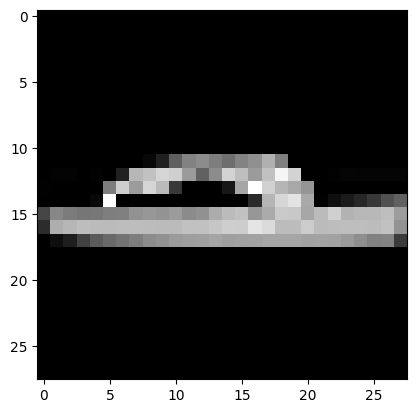

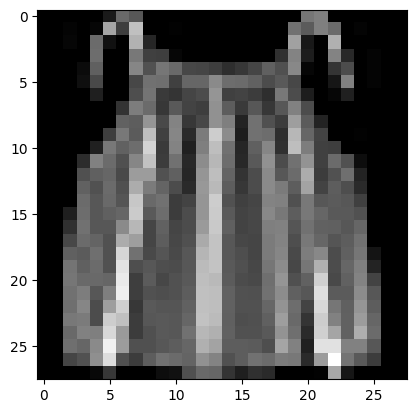

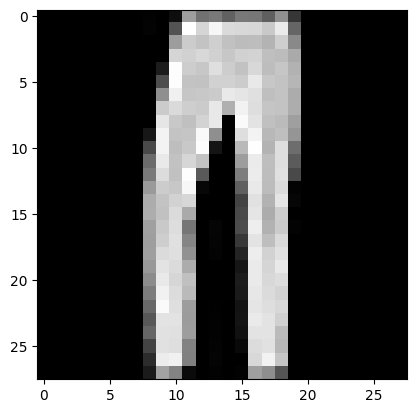

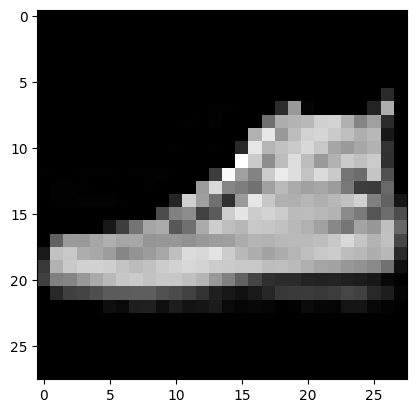

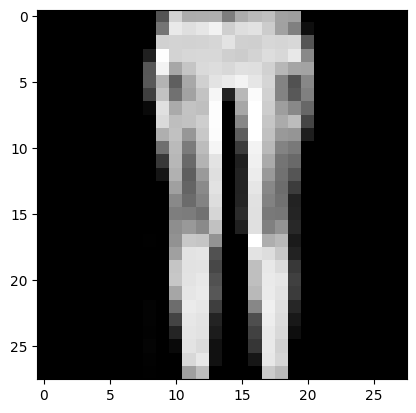

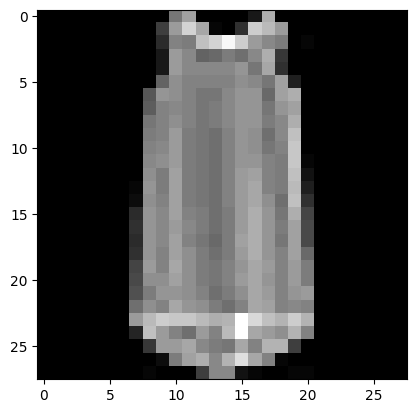

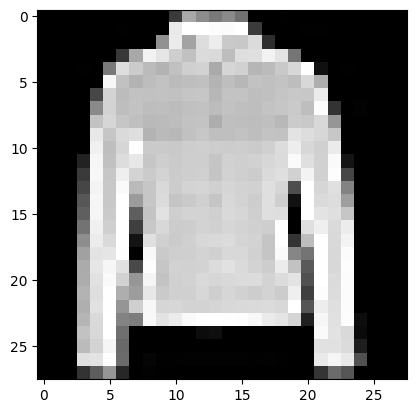

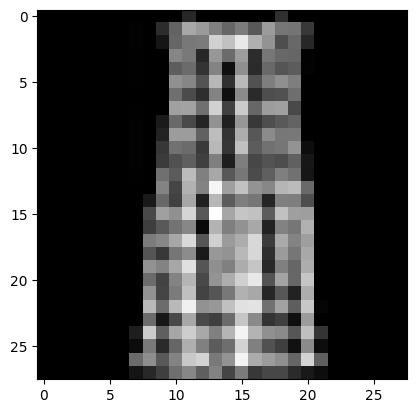

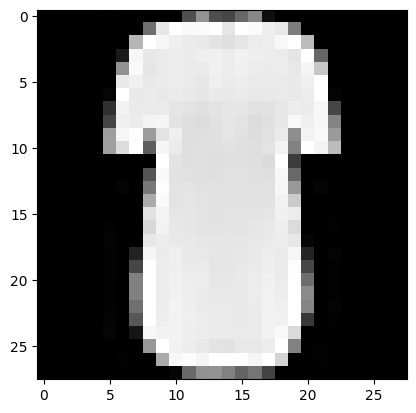

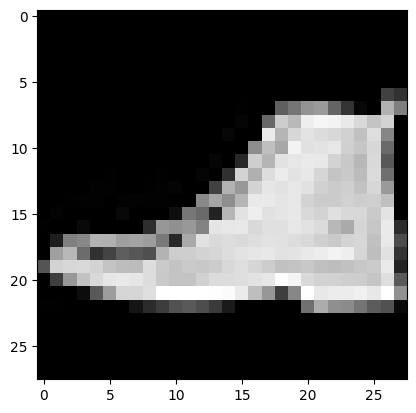

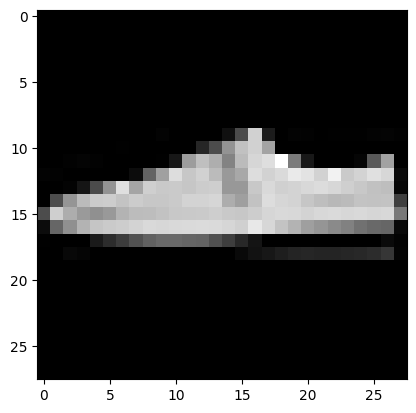

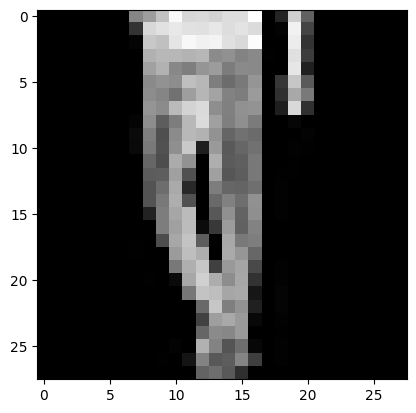

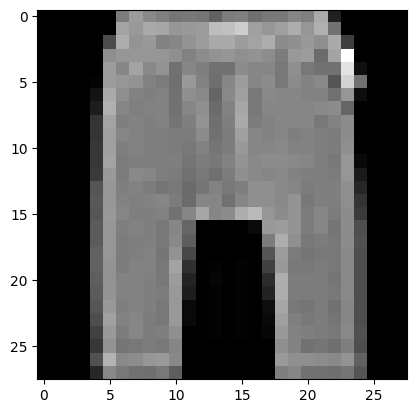

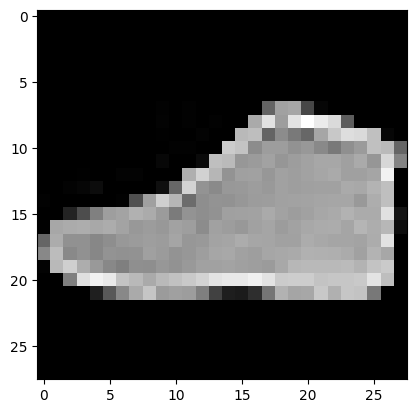

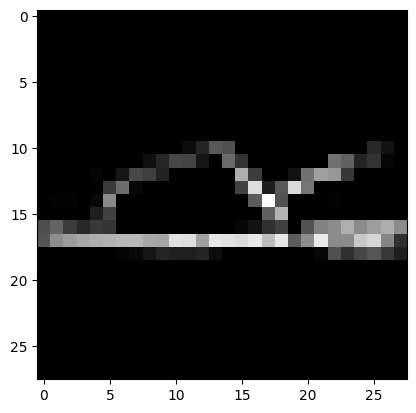

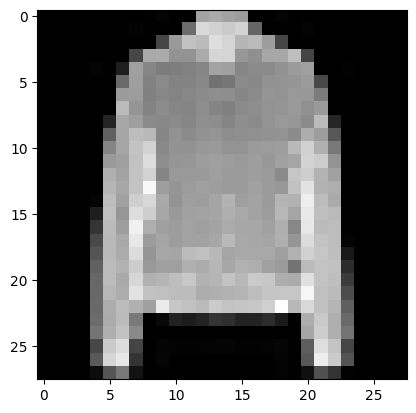

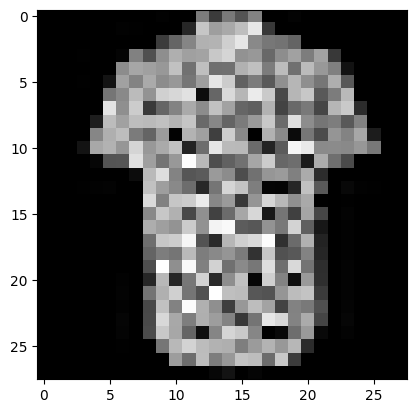

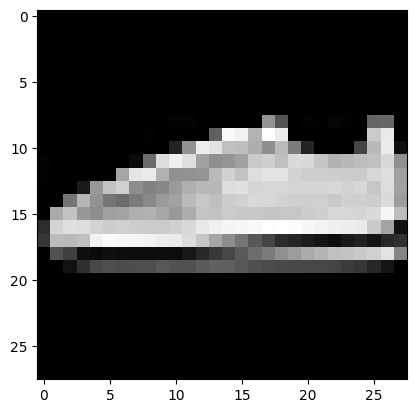

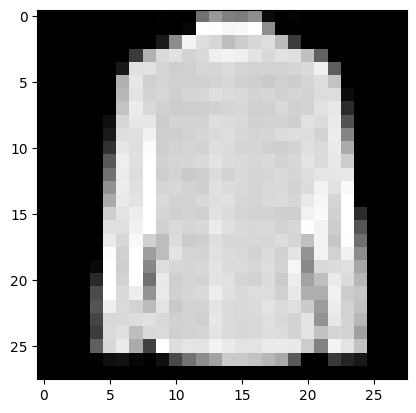

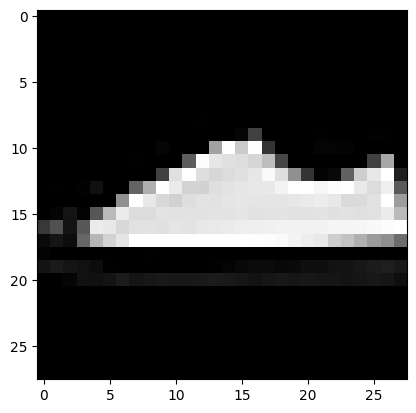

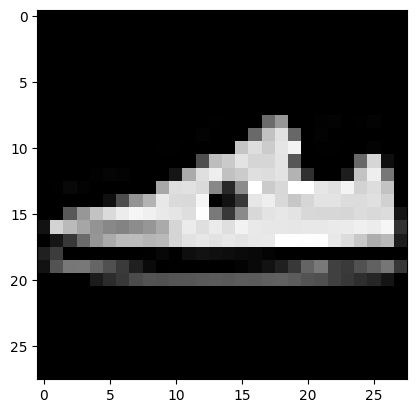

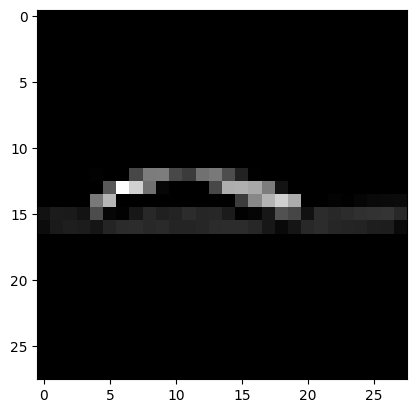

In [10]:
# 범위는 알아서, 이미지 30장 출력해보기!
random_list = np.random.randint(50000, size = 30)
random_list

for idx in random_list:
  plt.imshow(X_train[idx], cmap ='gray')
  plt.show()

In [ ]:
# y_train
# 답데이터의 카테고리 개수는 몇 개인가?
# 마지막 출력층 유닛 개수를 결정함!


In [11]:
# y_train
# 답데이터의 카테고리 개수는 몇개인가?
# 마지막 출력층 유닛 개수를 결정함!
np.unique(y_train).size

# 각각 몇개씩 들어있지?
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [12]:
# 다중분류 답데이터 전처리
# 원핫인코딩!
# pd -> get_dummies
# keras -> to_categorical()
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train) # 훈련 답
y_test_oh = to_categorical(y_test) # 훈련 답

# 크기확인
print('훈련답 : ', y_train_oh.shape)
print('테스트답 : ', y_test_oh.shape)

훈련답 :  (60000, 10)
테스트답 :  (10000, 10)


In [13]:
# 문데 데이터 전처리
# mlp 1차원만 인식 가능
# 이미지 1장 2차원 > 1차원 (펴줌)
X_train2 = X_train.reshape(60000, 28*28)
X_test2 = X_test.reshape(10000, 28*28) # .reshape(10000, -1)

# 크기확인
print('훈련문제 : ', X_train2.shape)
print('테스트문제 : ', X_test2.shape)
# 이미지 1장은 1차원, 784개의 특성이 존재

훈련문제 :  (60000, 784)
테스트문제 :  (10000, 784)


#### 활성화 함수, 최적화 함수별 비교
 - 1. 중간층 활성화 : sigmoid, 최적화 함수: sgd
 - 2. 중간층 활성화 : relu, 최적화 함수 : sgd
 - 3. 중간층 활성화 : relu, 최적화 함수 : adam
  - 각 신경망을 설계하고 결과를 비교해보자!

In [21]:
# optimizer 임폴트
from tensorflow.keras.optimizers import SGD,Adam

In [22]:
# 모델 생성 함수를 정의
# 활성화 함수 , 최적화함수 매개변수로 연결
def create_model(acti, opti):
  # 모델 생성
  model = Sequential()

  # 입력층 + 중간층1(200)


  # 중간층2개(100.50)
  # 출력층(클래스개수만큼, 활성화 = ' softmax')
  model.add(Dense(units=200, input_dim=784, activation=acti))

  # 중간층
  model.add(Dense(units=100, activation=acti))
  model.add(Dense(units=50, activation=acti))

  # 출력층 (다중 분류에 맞게 변경)
  model.add(Dense(units=10, activation='softmax'))

  # 요약 정보
  model.summary()

  # 학습/평가 방법 설정(complie)
  model.compile(loss='categorical_crossentropy',
                optimizer=opti,
                metrics=['accuracy'])




  # 반환 model
  return model

In [16]:
# fit 함수 정의
# estimator : 예측기
# 모델명만 넣어주면 fit 진행하는 함수
def fit_model(estimator):
  # 학습 코드 : 30정도 반복, 문제데이터, 답 데이터, 검증 데이터(train데이터 분리)
  h = estimator.fit(X_train2, y_train_oh,
                    validation_split = 0.3, # 30% 검증용
                    # validation_data = (X_val, y_val)
                    epochs = 30)

  # 반환 학습현황
  return h

In [17]:
# 1. sig+sgd
# 학습률 조정하고 싶다면 SGD 불러서 변경 가능
# SGD(learning_rate =0.01) == 'sgd'
model1 = create_model(acti='sigmoid',opti=SGD(learning_rate = 0.01))
h1 = fit_model(model1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 2.0802 - accuracy: 0.4417 - val_loss: 1.7617 - val_accuracy: 0.5603
Epoc

In [ ]:
# 2. model: relu + sgd(0.01)
model2 = create_model('relu', SGD(learning_rate = 0.01))
h2 = fit_model(model2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1313/1313 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.1008
Epoch 2/

In [ ]:
# 3. model3: 'relu' + Adam(0.001)
# model3 = create_model('relu',Adam())
# model3 = create_model('relu', 'adam')
model3 = create_model('relu',Adam(0.001))
h3 = fit_model(model3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               157000    
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1313/1313 [==============================] - 11s 8ms/step - loss: 1.5282 - accuracy: 0.7563 - val_loss: 0.5972 - val_accuracy: 0.7889
E

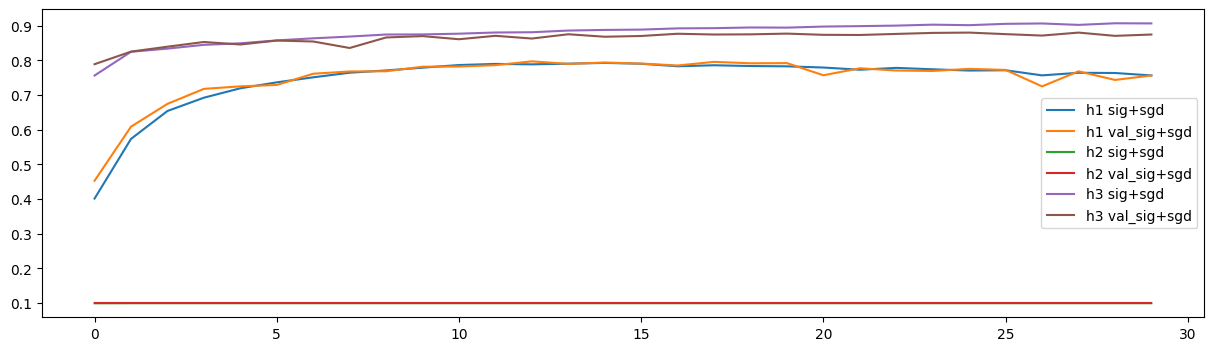

In [ ]:
# h1, h2, h3 학습 현황 활용해서 선 그래프 시각화
# accuracy, val_accuracy - 6개 선그래프 그릴 것
# 범례 출력
# plt.show() 마지막에 한 번만 적기
# 어떤 조합이 제일 좋을지 확인 !
plt.figure(figsize=(15,4))
plt.plot(h1.history['accuracy'], label = 'h1 sig+sgd')
plt.plot(h1.history['val_accuracy'], label = 'h1 val_sig+sgd')

plt.plot(h2.history['accuracy'], label = 'h2 sig+sgd')
plt.plot(h2.history['val_accuracy'], label = 'h2 val_sig+sgd')

plt.plot(h3.history['accuracy'], label = 'h3 sig+sgd')
plt.plot(h3.history['val_accuracy'], label = 'h3 val_sig+sgd')
plt.legend() # 범례 표시
plt.show() # 1장 도화지에 모든 그래프 다 출력

### 최적화 모델 찾기
 - 모델체크포인트 : 최적의 성능일 때 모델 저장
 - 얼리스탑핑 : 조기학습중단

In [18]:
# os 라이브러리 임폴트 - 운영체제
# 폴더 생성하는 함수 연결
import os
# 모델 체크포인트, 얼리스탑핑
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
# 모델 저장 관련 설정
# 1. 저장할 폴더 생성
model_dir = './model/'
# 없으면 생성
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

# 2. 어떤 상태의 모델 저장할건지, 어떤 경로에 저장할건지 정의
# fashion_01_0.268.hdf5
# {매개변수:저장형식} : 정규표현식(식)
file_path = model_dir + 'fashion_{epoch:02d}_{val_accuracy:3f}.hdf5'
f_mckp = ModelCheckpoint(filepath = file_path, # 모델 저장경로
                         monitor = 'val_accuracy', # 모니터할 값
                         save_best_only = True, # 저장시점 - 성능이 개선됐을 때
                         verbose=1) # 저장되는 현황 문자열 출력



In [26]:
# 조기학습중단 정의
# 어떤 상태일 때 학습을 멈출 것인지
f_early = EarlyStopping(monitor = 'val_accuracy', # 모니터할 값
                        patience = 5, # 몇 번 성능 개선할지 기다리는 횟수
                        verbose =1) # 조기학습중단 현황 문자열 출력

In [27]:
# 모델 학습
# 저장, 멈추는 기능 연결
# 문제 데이터, 답데이터 전처리 실행하기
model4 = create_model('relu', 'adam')
h4 = model4.fit(X_train2, y_train_oh,
                validation_split = 0.3,
                epochs =30,
                callbacks = [f_mckp, f_early])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1311/1313 [============================>.] - ETA: 0s - loss: 1.6876 - accuracy: 0.6624
Epoch 1: val_accuracy improved from -inf to 0.72

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1305/1313 [============================>.] - ETA: 0s - loss: 0.6731 - accuracy: 0.7537
Epoch 2: val_accuracy improved from 0.72333 to 0.79128, saving model to ./model/fashion_02_0.791278.hdf5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6732 - accuracy: 0.7535 - val_loss: 0.5765 - val_accuracy: 0.7913
Epoch 3/30
1308/1313 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7974
Epoch 3: val_accuracy improved from 0.79128 to 0.81083, saving model to ./model/fashion_03_0.810833.hdf5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5395 - accuracy: 0.7975 - val_loss: 0.4896 - val_accuracy: 0.8108
Epoch 4/30
1305/1313 [============================>.] - ETA: 0s - loss: 0.4790 - accuracy: 0.8257
Epoch 4: val_accuracy improved from 0.81083 to 0.82833, saving model to ./model/fashion_04_0.828333.hdf5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4792 - accuracy: 0.8256 - val_loss: 0.4629 - val_accuracy: 0.8283
Epo

In [28]:
# fashion_17_0.878.hdf5
# 모델 불러오기
from tensorflow.keras.models import load_model

In [30]:
best_model = load_model('./model/fashion_17_0.878.hdf5')
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# test 데이터 활용하기
# 예측
# 평가 - accuracy 출력하기
# X_test2, y_test_oh
pred = best_model.predict(X_test2)
pred

313/313 [==============================] - 1s 2ms/step


array([[1.6274883e-18, 1.2805505e-14, 1.7213203e-17, ..., 3.2998566e-02,
        1.2267429e-06, 9.6273112e-01],
       [6.5662772e-07, 6.2161519e-14, 9.9123454e-01, ..., 0.0000000e+00,
        9.6482171e-12, 4.0132438e-36],
       [2.1035143e-13, 9.9999994e-01, 3.1786843e-15, ..., 9.1100361e-31,
        1.9425962e-13, 6.2113546e-35],
       ...,
       [0.0000000e+00, 2.8168609e-27, 2.9202379e-18, ..., 1.3104083e-32,
        9.9999994e-01, 1.9121725e-28],
       [7.6101167e-14, 9.9999994e-01, 7.7931266e-14, ..., 1.2397179e-26,
        5.8226156e-14, 1.7223810e-32],
       [2.1915605e-06, 2.2071600e-11, 9.3016888e-12, ..., 1.2650535e-02,
        1.2182642e-04, 6.4563458e-03]], dtype=float32)

In [33]:
pred.shape
# 10000 문제에 대한 답, 10 각 클래스에 대한 확률

(10000, 10)

In [34]:
# X_test2 -> 0 문제 대한 예측 결과
pd.Series(pred[0].sort_values(ascending = False))

array([1.6274883e-18, 1.2805505e-14, 1.7213203e-17, 9.5306145e-18,
       1.1597827e-24, 4.2689778e-03, 4.0082117e-12, 3.2998566e-02,
       1.2267429e-06, 9.6273112e-01], dtype=float32)

In [35]:
# 모든 예측 결과의 값을 클래스로 확인하는 방법
# axis = 1 열방향
# np.argmax() : 배열 요소에서 제일 큰값을 가진 위치(인덱스) 반환
np.argmax(pred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [36]:
best_model.evaluate(X_test2, y_test_oh)[1]

313/313 [==============================] - 2s 4ms/step - loss: 0.3990 - accuracy: 0.8653


0.8652999997138977

In [38]:
arr = np.arange(30).reshape(6,-1)

np.argmax(arr[1])
# arr
arr[1]

4